(4001, 2)
[['x1' 'x2']
 ['1.90756725753191' '0.3258651323941302']
 ['2.270543675093187' '2.2588165178373942']
 ...
 ['3.0596908967356997' '-2.873532452272567']
 ['3.5256071849898314' '-2.3310695379855133']
 ['1.720058977819048' '-1.1346401064791678']]
(4001,)
['y' '0' '0' ... '1' '1' '1']
[0 0 0 ... 2 2 2]
(3000, 2)
(3000,)


'Locate columns with null values'

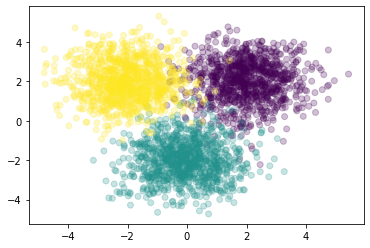

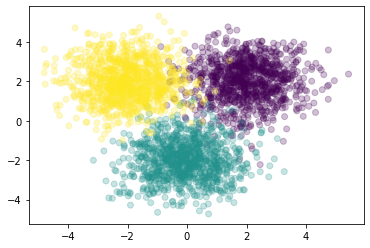

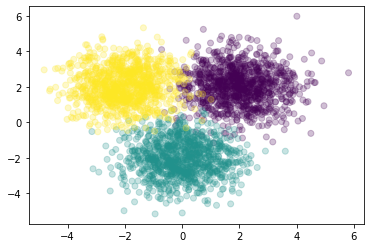

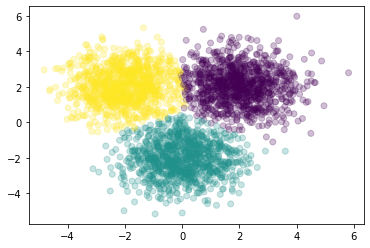

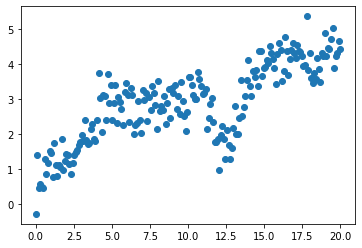

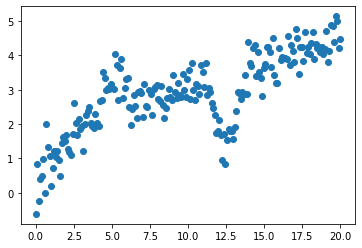

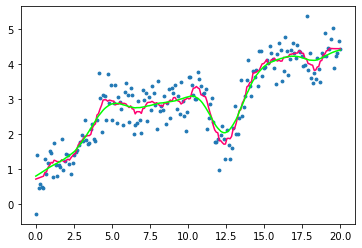

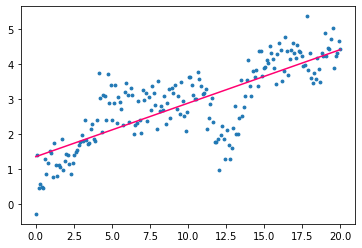

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import math
import numpy as np
import random
from intro_to_Naive_Bayes import GaussBayes, accuracy
from KNN_Classifier import KNNClassifier, accuracy
from Simple_Regression import OURLinearRegression, KNNRegressor,R2,KMeans

random.seed(9001)
#WHAT!? 9000!?!?
df = pd.read_csv (r'C:\Users\Field Employee\Downloads\raw_house_data.csv')

'''Replace all instances of "None" with "0" for the sake of consistency (descrepencies noticed in the garage and HOA columns specifically'''
df = df.replace(['None'],'0')
nan_col=[]
for header in df.head():
    miss=df[header].isnull().values.any()
    if miss==True:
            nan_col.append(header)

'''Locate columns with null values'''

In [2]:
'''Gather the indicies with null values'''
nan_acres=df.loc[df['lot_acres'].isnull()]
nan_mls=nan_acres['MLS']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
nan_mls=nan_mls.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(nan_acres)):
    row=nan_mls.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
#print(df.loc[df['MLS'] == 3058213])


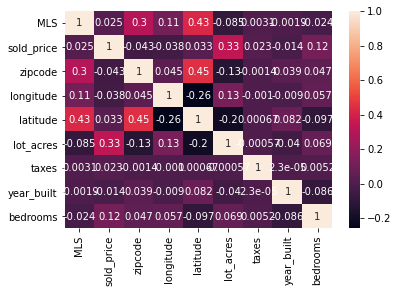

In [3]:
corr=df.corr()
sn.heatmap(corr, annot=True)
plt.show()

In [4]:
miss_col=[]
for header in df.head():
    miss=df.loc[df[header]=='0']
    if miss.empty==False:
            miss_col.append(header)

print(miss_col)

['bathrooms', 'sqrt_ft', 'garage', 'kitchen_features', 'fireplaces', 'floor_covering', 'HOA']


In [5]:
z_lot=df.loc[df['lot_acres']==0]
'''Gather the indicies with 0 values'''
z_mls=z_lot['MLS']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
z_mls=z_mls.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(z_lot)):
    row=z_mls.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
print(df.shape) 

(4955, 16)


In [6]:
z_tax=df.loc[df['taxes']==0]
'''Gather the indicies with 0 values'''
z_mls=z_tax['MLS']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
z_mls=z_mls.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(z_tax)):
    row=z_mls.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
print(df.shape) 

(4934, 16)


In [7]:
z_bath=df.loc[df['bathrooms']=='0']
'''Gather the indicies with 0 values'''
z_mls=z_bath['MLS']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
z_mls=z_mls.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(z_bath)):
    row=z_mls.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
print(df.shape) 

(4928, 16)


In [8]:
z_sq=df.loc[df['sqrt_ft']=='0']
'''Gather the indicies with 0 values'''
z_mls=z_sq['MLS']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
z_mls=z_mls.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(z_sq)):
    row=z_mls.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
print(df.shape) 

(4888, 16)


In [9]:
z_gar=df.loc[df['garage']==0]
print(z_gar.shape)
df["garage"] = pd.to_numeric(df["garage"])
'''left in so that if need be the next team can quickly convert columns to numerics instead of dealing with strings'''

(0, 16)


'left in so that if need be the next team can quickly convert columns to numerics instead of dealing with strings'

In [10]:
ind=df.loc[df['longitude']==-112.520168].index
df=df.drop(index=ind)
'''Drop longitude outlier (108 miles away from nearest house)'''

'Drop longitude outlier (108 miles away from nearest house)'

In [11]:
hoa_col=df['HOA']
hoa_col=hoa_col.sort_values()
i=0
hoa_col=hoa_col.reset_index()
'''Column consists of strings so I collect all of the entries longer than 4 characters'''
h=[]
while(i<len(hoa_col)):
    row=hoa_col.iloc[i]
    hoa=row.get(key=1)
    if len(hoa)>4:
        h.append(row.get(key=1))
    #ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    i+=1 
'''next lowest group of HOA values are in the 1000s'''
ind=df.loc[df['HOA']=='5,900'].index
df=df.drop(index=ind)

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

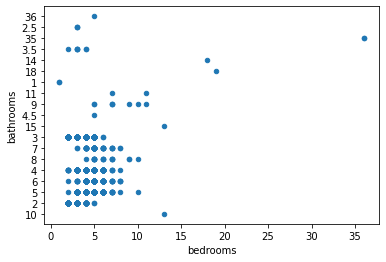

In [12]:
'''scatter for bed & bath'''
df.plot.scatter(x= 'bedrooms', y= 'bathrooms')

In [13]:
'''household has 36 bathrooms and 5 bedrooms'''
ind=df.loc[df['bathrooms']=='35'].index
df=df.drop(index=ind)

In [14]:
x=df.loc[df['bedrooms']==36]
print(x)

Empty DataFrame
Columns: [MLS, sold_price, zipcode, longitude, latitude, lot_acres, taxes, year_built, bedrooms, bathrooms, sqrt_ft, garage, kitchen_features, fireplaces, floor_covering, HOA]
Index: []


(4884, 16)

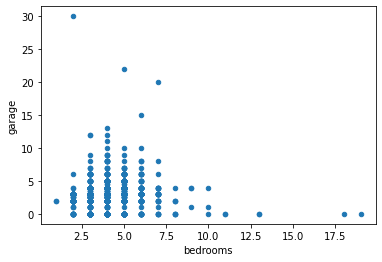

In [15]:
'''scatter for bed & bath'''
df.plot.scatter(x= 'bedrooms', y= 'garage')
df.shape

In [16]:
'''household have bathrooms and 5 bedrooms'''
gar=df.loc[df['garage']>14]
'''Gather the indicies with 0 values'''
gar_mls=gar['MLS']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
gar_mls=gar_mls.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(gar)):
    row=gar_mls.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
print(df.shape) 

(4880, 16)


In [17]:
#Drop kitchen_features there is too much variation elec. "stove and electric stove"
df=df.drop(columns='kitchen_features')

In [18]:
fc=df['floor_covering'].unique()
'''Floor covering seems to be composed of a set of options with an aditional option "other" which allows you to write an a cover'''
#add each option to a set to be rid of dups
fc_set=set()
for row in fc:#list of str
    #comma seperated floor coverings
    cov=row
    start_ind=0
    comma_ind=cov.find(',')
    while(comma_ind!=-1):#find returns a -1 if no comma is found
        covering=cov[start_ind:comma_ind]
        fc_set.add(covering)
        start_ind=comma_ind+1
        comma_ind=cov.find(',',start_ind,len(cov)-1)
    fc_set.add(cov[start_ind:])
print(fc_set)

{'Other: Recycled Porcelain', ' Other: Brazilian Pergo', ' Other: Eng wood', ' Other: Dyed Concrete', ' Other: Porcelain-wood', ' Other: Limestone', ' Other: Bamboo', ' Other: High End Laminate', 'Other: Tile', ' Other: engineered wood', ' Other: Egytian sandstone', 'Other: Brick', ' Other: Multiple Types', ' Other: Tile bathrooms', 'Other: Italian tile', ' Laminate', 'Other: Porcelain tile', ' Other: gray saltillo', 'Other: Polish concrete', ' Other: Porcelain Tile', ' Other: Parquet', ' Other: Concrete tile', ' Other: Master Bedroom/ Tile', ' Other: porcelain', ' Other: CONCRETE TILE', ' Other', ' Other: Tile/Powder Rm', ' Other: Travertine', ' Other: Brick', ' Indoor/Outdoor', ' Other: cork', ' Other: Engineered Wood', 'Other: Quartzite', ' Other: Brick Floor', ' Other: porcelain wood tile', ' Other: Polished Concrete', ' Concrete', ' Other: brick', 'Other: Italian Tile', ' Other: Italian Tile', ' Other: Flagstone', ' Mexican Tile', ' Natural Stone', ' Other: Red Brick', ' Other: Pe

In [19]:
#checking number of occurance to qualfy which floor covering should be their own column
"""ceramic tile:2469*
concrete:744*
granite:1
indoor/outdoor
laminate:86*#106 w/ wood *cheap iterate laminate first*
mexican tile:646*
natural stone:1472*#1479 as stone + quarzite
carpet:3437*
wood:1220*#conditional for not laminate """
count=0
cv=df['floor_covering']
for row in cv:
    if 'lam' in row.lower() and 'wood' in row.lower():count+=1
print(count)

20


In [20]:
#Ceramic population
cer=[]
i=0
cov=df['floor_covering']
for row in cov:
    if 'ceramic' in row.lower():cer.append(1)
    else:cer.append(0)
    i+=1
df['ceramic tile']=cer

In [21]:
#Concrete population
conc=[]
i=0
cov=df['floor_covering']
for row in cov:
    if 'conc' in row.lower():conc.append(1)
    else:conc.append(0)
    i+=1
df['concrete']=conc

In [22]:
#Mexican tile population
mex=[]
i=0
cov=df['floor_covering']
for row in cov:
    if 'mex' in row.lower():mex.append(1)
    else:mex.append(0)
    i+=1
df['mexican tile']=mex

In [23]:
#Natural stone population
nat=[]
gran=[]
i=0
cov=df['floor_covering']
for row in cov:
    if 'stone' in row.lower():nat.append(1)
    else:nat.append(0)
    i+=1
df['natural stone']=nat
#add quartzite as natural stone
quar=df.loc[df['floor_covering']=='Other: Quartzite'].index
df.loc[quar,'natural stone']=1

In [24]:
#Carpet population
carp=[]
i=0
cov=df['floor_covering']
for row in cov:
    if 'carp' in row.lower():carp.append(1)
    else:carp.append(0)
    i+=1
df['carpet']=carp

In [25]:
#Laminate population
lam=[]
i=0
cov=df['floor_covering']
for row in cov:
    if 'lam' in row.lower():lam.append(1)
    else:lam.append(0)
    i+=1
df['laminate']=lam

In [26]:
#wood population
wood=[]
i=0
cov=df['floor_covering']
for row in cov:
    #avoid double couning "other: laminate wood" and its variations
    if 'wood' in row.lower() and 'lam' not in row.lower():wood.append(1)
    else:wood.append(0)
    i+=1
df['wood']=wood

In [27]:
#other population
other=[]
i=0
double_dip=['ceramic','concrete','mex','stone','carpet','lam', 'wood']
cov=df['floor_covering']
for row in cov:
    #avoid double counting "other: laminate wood" and its variations
    repeat=False
    #If any of the coverings with their own columns are detected break the double_dip loop and append a 0 to avoid double count
    for double in double_dip:
        if double in row.lower():
            repeat=True
            break
    if repeat==False:other.append(1)
    else:other.append(0)
    i+=1
df['other']=other
#other column  is binary
'''oth=[]
for row in cov:
    if 'other' in row.lower():oth.append(row)
print(oth)'''

"oth=[]\nfor row in cov:\n    if 'other' in row.lower():oth.append(row)\nprint(oth)"

In [28]:
sq=df['sqrt_ft']
sort=sorted(sq)
#sq.iat[math.floor(len(sq)**.25)-1]
q1=math.floor(len(sq)*.25)
q2=math.floor(len(sq)*.5)
q3=math.floor(len(sq)*.75)
sq_bucket=[]
for row in sq:
    if row<=sort[q1]:sq_bucket.append(.25)
    elif row<=sort[q2]:sq_bucket.append(.5)
    elif row<=sort[q3]:sq_bucket.append(.75)
    else:sq_bucket.append(1)
df['sqrt_ft_quart']=sq_bucket
#sq.describe()
#print(sq.iat[1219])
print(len(sq))
print(q1)
print(q2)
print(q3)
print(sort[q1])
print(sort[q2])
print(sort[q3])

4880
1220
2440
3660
3047
3514
4127


In [29]:
df["sqrt_ft"] = pd.to_numeric(df["sqrt_ft"])
sqd=df['sqrt_ft']
psf=df['sold_price']
i=0
price_sq=[]
while i<len(sqd):
    ppsf=psf.iloc[i]/sqd.iloc[i]
    price_sq.append(ppsf)
    i+=1
df['price_per_sqft']=price_sq

In [30]:
#Trimming top & bottom 5%
df["price_per_sqft"] = pd.to_numeric(df["price_per_sqft"])

sq=df['price_per_sqft']
sort=sorted(sq)
t5=math.floor(len(sq)*.95)
b5=math.floor(len(sq)*.05)
top=sort[t5:]
bottom=sort[:b5+1]
fat=[]
for i in bottom:
    fat.append(i)
for i in top:
    fat.append(i)
for i in fat:
    ind=df[df['price_per_sqft'] == i].index.values
    df=df.drop(ind)

(array([122., 189., 243., 305., 382., 358., 359., 410., 382., 347., 257.,
        225., 186., 167., 110.,  93.,  94.,  72.,  53.,  37.]),
 array([139.34606101, 147.70442845, 156.0627959 , 164.42116335,
        172.7795308 , 181.13789824, 189.49626569, 197.85463314,
        206.21300059, 214.57136804, 222.92973548, 231.28810293,
        239.64647038, 248.00483783, 256.36320527, 264.72157272,
        273.07994017, 281.43830762, 289.79667507, 298.15504251,
        306.51340996]),
 <BarContainer object of 20 artists>)

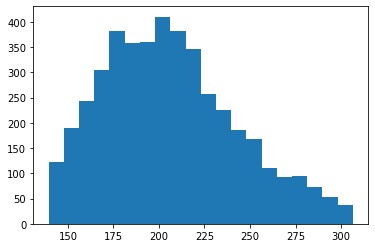

In [31]:
plt.hist((df['sold_price']/df['sqrt_ft']),20)

In [32]:
'''Creating bins for ppsft'''
ppsf=df['price_per_sqft']
start=120
step=10
ppsft_bin=[]
for row in ppsf:
    i=0
    box=start+(step*i)
    while row>box:
        i+=1
        box=start+(step*i)
    ppsft_bin.append(i)
df['ppsqft_bin']=ppsft_bin

In [62]:
X_labels=['sqrt_ft_quart','ceramic tile']
Xset=pd.DataFrame()
for column in X_labels:
    Xset[column]=df[column]
print(Xset.to_numpy())

[[0.25 0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.25 1.  ]
 [0.25 1.  ]
 [0.75 1.  ]]


In [145]:
val_ind=math.floor(len(df)*.9)
Xset=['sqrt_ft_quart','ceramic tile','concrete','mexican tile','natural stone','carpet','laminate','wood','other','price_per_sqft']
#Xset=['price_per_sqft','x','y']
cleaned=df[Xset]
Yset=df['sold_price']
train_ind=math.floor(len(cleaned)*.8)
train_X=cleaned.iloc[:train_ind,:]
train_X=train_X.to_numpy()
train_y=Yset.iloc[:train_ind]
train_y=train_y.to_numpy()
val_X=cleaned.iloc[train_ind:val_ind,:]
val_X=val_X.to_numpy()
val_y=Yset.iloc[train_ind:val_ind]
val_y=val_y.to_numpy()
test_X=cleaned.iloc[val_ind:,:]
test_X=test_X.to_numpy()
test_y=Yset.iloc[val_ind:]
test_y=test_y.to_numpy()

KeyError: "['x', 'y'] not in index"

-36.97739333243878

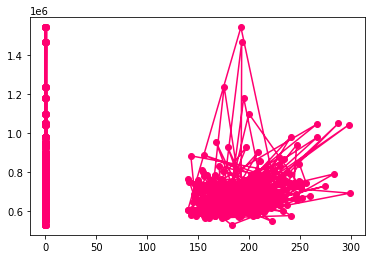

In [34]:
knn=KNNRegressor()
knn.fit(train_X,train_y)
y_hat=knn.predict(val_X,2,epsilon=1e-3)
plt.figure()
#plt.scatter(val_X,y_hat,s=8)
plt.plot(val_X,y_hat,color='#FF0070', marker ='o')
#print(y_hat)
R2(val_y,y_hat)

C:\Users\Field Employee\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Field Employee\OneDrive\Desktop\Cleaned_House\Simple_Regression.py:165: RuntimeWarning: overflow encountered in square
  return(1/(2*N)*np.sum((Y-Y_hat)**2))
C:\Users\Field Employee\OneDrive\Desktop\Cleaned_House\Simple_Regression.py:199: RuntimeWarning: invalid value encountered in matmul
  return X @ self.W
C:\Users\Field Employee\OneDrive\Desktop\Cleaned_House\Simple_Regression.py:188: RuntimeWarning: invalid value encountered in matmul
  self.W -= eta*(1/N)*(X.T@(Y_hat - Y)) # (1/N)*(lambd*np.abs(self.W)**(p-1)*np.sign(self.W)))
C:\Users\Field Employee\OneDrive\Desktop\Cleaned_House\Simple_Regression.py:188: RuntimeWarning: invalid value encountered in subtract
  self.W -= eta*(1/N)*(X.T@(Y_hat - Y)) # (1/N)*(lambd*np.abs(self.W)**(p-1)*np.sign(self.W)))


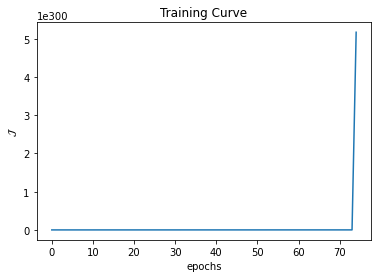

In [35]:
olr=OURLinearRegression()
olr.fit(train_X,train_y,epochs=1e3,eta=2e-3,show_curve=True)

In [36]:
y_hat=olr.predict(val_X)
R2(val_y,y_hat)

nan

In [93]:
val_ind=math.floor(len(df)*.9)
Y_labels=['ppsqft_bin']
X_labels=['latitude','longitude']
Xset=pd.DataFrame()
for column in X_labels:
    Xset[column]=df[column]
Yset=df['ppsqft_bin']
print(features.shape)
print(Yset.shape)
train_ind=math.floor(len(features)*.8)
train_X=features.iloc[:train_ind,:]
train_X=train_X.to_numpy()
train_y=Yset.iloc[:train_ind]
train_y=train_y.to_numpy()
val_X=features.iloc[train_ind:val_ind,:]
val_X=val_X.to_numpy()
val_y=Yset.iloc[train_ind:val_ind]
val_y=val_y.to_numpy()
test_X=features.iloc[val_ind:,:]
test_X=test_X.to_numpy()
test_y=Yset.iloc[val_ind:]
test_y=test_y.to_numpy()
print(train_X)

(4391, 2)
(4391,)
[[  32.261069 -110.883315]
 [  32.331603 -110.861002]
 [  32.341609 -110.918294]
 ...
 [  32.342394 -110.936117]
 [  32.267488 -110.820187]
 [  31.897662 -110.942704]]


In [94]:
y1=df['ppsqft_bin'].to_numpy()

In [95]:
X1=df['latitude'].to_numpy()

In [96]:
X2=train_X[:,1:]

In [97]:
X1=X1[:]

In [98]:
X2=X2[:,0]

In [99]:
X3=np.zeros((3512,2))

In [100]:
y2=y1[0:train_ind]

In [102]:
X3[:,0]=X1[0:train_ind]

In [103]:
X3[:,1]=X2

In [150]:
import matplotlib

In [115]:
X3[1]

[[  32.261069 -110.883315]
 [  32.331603 -110.861002]
 [  32.341609 -110.918294]
 ...
 [  32.342394 -110.936117]
 [  32.267488 -110.820187]
 [  31.897662 -110.942704]]


In [179]:
cmap1=plt.get_cmap('Accent')

(32.0, 32.6)

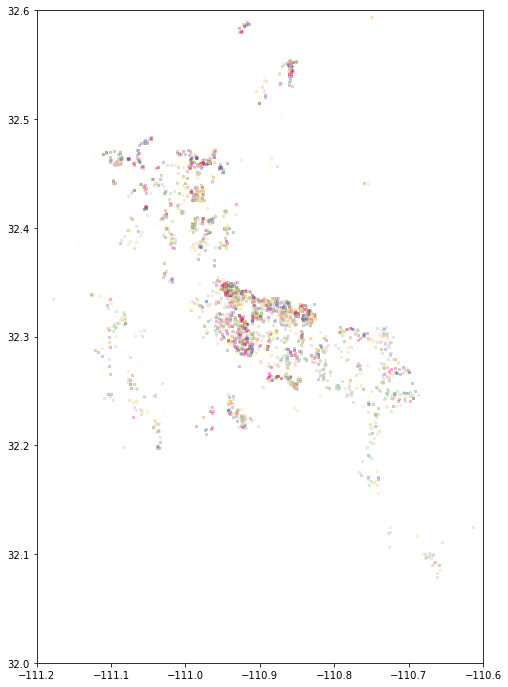

In [180]:
plt.figure(figsize=(8,12))
plt.scatter(X3[:,1],X3[:,0],cmap=cmap1,c=y_hat, alpha=0.25, marker='s',s=4)
plt.xlim(-111.2,-110.6)
plt.ylim(32,32.6)

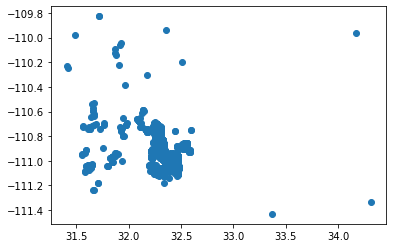

In [106]:
plt.figure()
plt.scatter(train_X[:,0],train_X[:,1])

In [167]:
knn=KNNClassifier()
#knn.fit(train_X,y2)
knn.fit(train_X,train_y)
#y_hat=knn.predict(val_X,3)
y_hat=knn.predict(train_X,2)
print(accuracy(y_hat,train_y))

0.9917425968109339


In [134]:
train_y.shape

(3512,)

In [136]:
y2.shape

(3512,)

In [140]:
np.max(y2-train_y)

0

In [128]:
print(X3)
print(y2)
print(np.mean(X3))
knn.fit(X3,y2)

[[  32.261069 -110.883315]
 [  32.331603 -110.861002]
 [  32.341609 -110.918294]
 ...
 [  32.342394 -110.936117]
 [  32.267488 -110.820187]
 [  31.897662 -110.942704]]
[ 8 17 17 ...  8  5  8]
-39.29580408656036


In [121]:
train_X.shape

(3512, 2)

In [122]:
train_X[1]

array([  32.331603, -110.861002])

In [129]:
y_hat= knn.predict(X3,3)

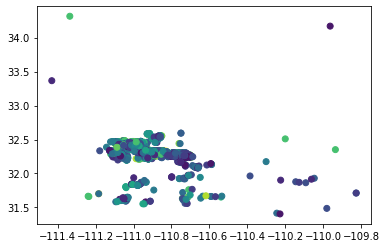

In [130]:
plt.figure()
plt.scatter(X3[:,1],X3[:,0],c=y_hat)

In [131]:
print(accuracy(y_hat,y2))

0.9464692482915718


In [126]:
y_hat

array([ 6., 17., 17., ..., 12.,  5.,  8.])